Install & Setup

In [1]:
# Cell 0: Install all dependencies (once per runtime)
!pip -q install nltk scikit-learn==1.6.0 xgboost==2.0.3 imbalanced-learn==0.12.3 wordcloud==1.9.3 matplotlib seaborn plotly joblib streamlit==1.36.0 emoji==2.12.1

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.1/13.1 MB 81.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 297.1/297.1 MB 5.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 258.3/258.3 kB 23.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 541.6/541.6 kB 37.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.6/8.6 MB 68.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 431.4/431.4 kB 34.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Load Data (True.csv + Fake.csv) & Merge

In [2]:
# Cell 1: Load & merge True.csv and Fake.csv (no manual upload)

import pandas as pd
import numpy as np
import os

# ==== ‡¶è‡¶ñ‡¶æ‡¶®‡ßá ‡¶´‡¶æ‡¶á‡¶≤‡ßá‡¶∞ path ‡¶∏‡ßá‡¶ü ‡¶ï‡¶∞‡ßÅ‡¶® ====
TRUE_PATH = "/content/True.csv"
FAKE_PATH = "/content/Fake.csv"

# Robust CSV reader (handles encoding issues)
def read_csv_safe(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"‚ùå File not found: {path}")
    for enc in ['utf-8', 'utf-8-sig', 'latin-1', 'cp1252']:
        try:
            return pd.read_csv(path, encoding=enc, engine='python')
        except Exception:
            continue
    raise ValueError(f"Could not read {path} with common encodings.")

true_df = read_csv_safe(TRUE_PATH)
fake_df = read_csv_safe(FAKE_PATH)

# Detect main text column
def pick_text_column(df):
    candidates = ['text', 'content', 'article', 'body', 'full_text', 'Text', 'CONTENT']
    titles     = ['title', 'headline', 'Title', 'HEADLINE']
    for c in candidates:
        if c in df.columns:
            return c, None
    for t in titles:
        if t in df.columns:
            return None, t
    obj_cols = [c for c in df.columns if df[c].dtype=='O']
    return (obj_cols[0] if obj_cols else df.columns[0]), None

t_text, t_title = pick_text_column(true_df)
f_text, f_title = pick_text_column(fake_df)

# Canonical dataframe builder
def to_canonical(df, txt_col, ttl_col, label_str):
    df = df.copy()
    if txt_col and txt_col in df.columns:
        text = df[txt_col].astype(str)
    elif ttl_col and ttl_col in df.columns:
        text = df[ttl_col].astype(str)
    else:
        text = df.select_dtypes(include='object').iloc[:,0].astype(str)
    if txt_col and ttl_col and (ttl_col in df.columns):
        text = (df[ttl_col].astype(str).fillna('') + ' ' + df[txt_col].astype(str).fillna('')).str.strip()
    out = pd.DataFrame({
        'text': text.fillna('').astype(str)
    })
    out['label_str'] = label_str
    out['label'] = 1 if label_str.lower()=='true' else 0
    return out

true_c = to_canonical(true_df, t_text, t_title, 'True')
fake_c = to_canonical(fake_df, f_text, f_title, 'Fake')

# Merge & clean
data = pd.concat([true_c, fake_c], axis=0, ignore_index=True)
data.drop_duplicates(subset=['text'], inplace=True)
data = data[(data['text'].str.len() > 5)]

print("‚úÖ Shape:", data.shape)
print(data['label_str'].value_counts())
data.head(3)


‚úÖ Shape: (38643, 3)
label_str
True    21191
Fake    17452
Name: count, dtype: int64


text label_str  label
0  WASHINGTON (Reuters) - The head of a conservat...      True      1
1  WASHINGTON (Reuters) - Transgender people will...      True      1
2  WASHINGTON (Reuters) - The special counsel inv...      True      1

Quick EDA & Visualization

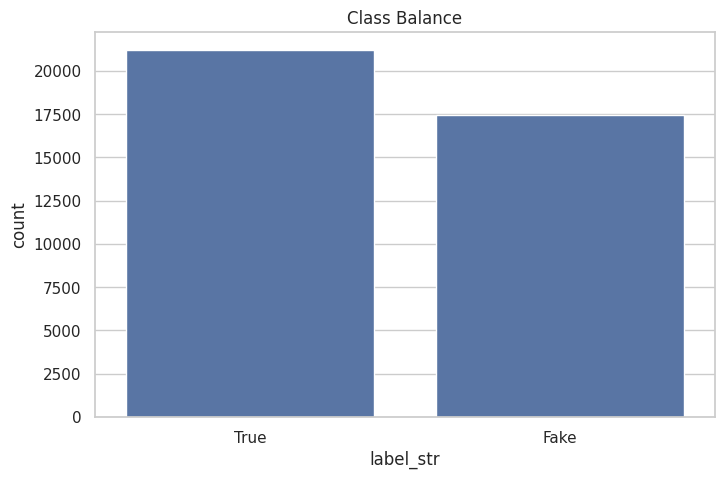

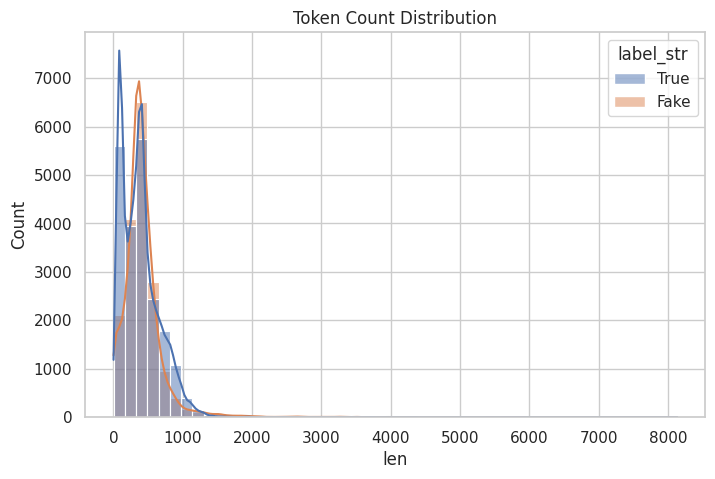

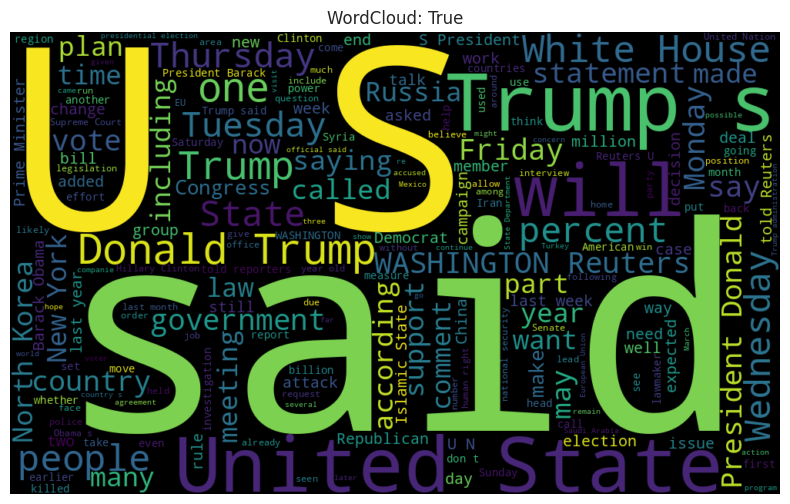

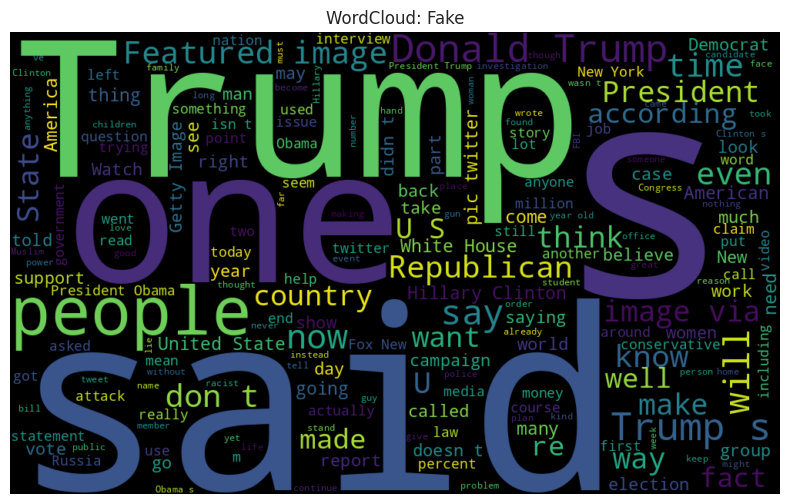

Top n-grams (True):


ngram  count
0            said  97814
1           trump  54073
2         reuters  28652
3       president  27855
4           state  20781
5      government  18550
6             new  16735
7           house  16462
8          states  16411
9      republican  16135
10         united  15360
11         people  15076
12           year  14583
13           told  14061
14     washington  12884
15          party  12589
16       election  12171
17  united states  12016
18       campaign  10535
19         donald  10370

Top n-grams (Fake):


ngram  count
0          trump  68072
1           said  24803
2         people  21187
3      president  20790
4           just  16742
5         donald  15285
6           like  14358
7   donald trump  14025
8        clinton  13529
9          obama  13378
10          time  10705
11           new  10396
12         white  10306
13          news  10207
14       hillary   9945
15         state   9490
16         image   9483
17       twitter   9465
18         right   8893
19      campaign   8835

In [3]:
# Cell 2: Class balance, length dist, wordclouds, top n-grams
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import re

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

# Class balance
ax = sns.countplot(x='label_str', data=data)
plt.title('Class Balance')
plt.show()

# Text length distribution
data['len'] = data['text'].str.split().apply(len)
sns.histplot(data, x='len', hue='label_str', bins=50, kde=True)
plt.title('Token Count Distribution')
plt.show()

# WordClouds
stop_words = set(STOPWORDS)
for cls in ['True','Fake']:
    txt = ' '.join(data.loc[data['label_str']==cls, 'text'].astype(str).values)
    txt = re.sub(r'http\S+|www\.\S+',' ', txt)
    wc = WordCloud(width=1000, height=600, stopwords=stop_words, max_words=200).generate(txt)
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off'); plt.title(f'WordCloud: {cls}')
    plt.show()

# Top n-grams (quick view)
from sklearn.feature_extraction.text import CountVectorizer

def top_ngrams(texts, n=20, ngram_range=(1,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english', min_df=2)
    X = vec.fit_transform(texts)
    sums = np.array(X.sum(axis=0)).ravel()
    idx = sums.argsort()[::-1][:n]
    vocab = np.array([t for t,_ in sorted(vec.vocabulary_.items(), key=lambda x:x[1])])
    return pd.DataFrame({'ngram': vocab[idx], 'count': sums[idx]})

print("Top n-grams (True):")
display(top_ngrams(data.loc[data.label_str=='True','text']))

print("Top n-grams (Fake):")
display(top_ngrams(data.loc[data.label_str=='Fake','text']))


Text Preprocessing Utilities

In [4]:
# Cell 3: Cleaner function (light but effective)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

en_stops = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def clean_text(s:str) -> str:
    s = s.lower()
    s = re.sub(r'<[^>]+>', ' ', s)         # HTML
    s = re.sub(r'http\S+|www\.\S+', ' ', s) # URLs
    s = re.sub(r'[^a-z\s]', ' ', s)        # keep letters
    s = re.sub(r'\s+', ' ', s).strip()
    tokens = [lemm.lemmatize(w) for w in s.split() if w not in en_stops]
    return ' '.join(tokens)

# Optional preview
data['clean'] = data['text'].astype(str).apply(clean_text)
data[['text','clean']].head(3)


text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   

                                               clean  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...

Train/Test Split

In [5]:
# Cell 4: Split
from sklearn.model_selection import train_test_split

X = data['clean'].values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test), y.mean()


(30914, 7729, np.float64(0.5483787490619259))

Build & Evaluate Multiple Models (TF-IDF + Classifiers)

In [7]:
# Cell 5: Multiple models with identical TF-IDF
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
# Removed problematic tree-based models: RandomForestClassifier, GradientBoostingClassifier, XGBClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report
import joblib
import os

tfidf = TfidfVectorizer(
    max_features=200000,
    ngram_range=(1,2),
    sublinear_tf=True,
    min_df=2
)

models = {
    "LogReg": LogisticRegression(max_iter=4000, n_jobs=-1, C=2.0, solver='liblinear'),
    "LinearSVC": LinearSVC(),
    "SGD": SGDClassifier(loss='log_loss', max_iter=2000, n_jobs=-1),
    "MNB": MultinomialNB(),
    "CNB": ComplementNB(),


}

results = []
trained = {}

for name, clf in models.items():
    pipe = Pipeline([('tfidf', tfidf), ('clf', clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    # Proba or decision scores for AUC
    try:
        y_prob = pipe.predict_proba(X_test)[:,1]
    except Exception:
        try:
            from sklearn.utils.extmath import softmax
            scores = pipe.decision_function(X_test)
            # minmax -> prob-ish
            mn, mx = scores.min(), scores.max()
            y_prob = (scores - mn) / (mx - mn + 1e-9)
        except Exception:
            y_prob = None

    acc = accuracy_score(y_test, y_pred)
    pr, rc, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append([name, acc, pr, rc, f1, auc])
    trained[name] = pipe
    print(f"‚úÖ {name}: acc={acc:.4f} f1={f1:.4f} auc={auc:.4f}")

results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1','ROC_AUC']).sort_values('F1', ascending=False)
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


‚úÖ LogReg: acc=0.9887 f1=0.9898 auc=0.9992
‚úÖ LinearSVC: acc=0.9946 f1=0.9951 auc=0.9998
‚úÖ SGD: acc=0.9812 f1=0.9831 auc=0.9978
‚úÖ MNB: acc=0.9551 f1=0.9595 auc=0.9899
‚úÖ CNB: acc=0.9574 f1=0.9614 auc=0.9899


Model  Accuracy  Precision    Recall        F1   ROC_AUC
1  LinearSVC  0.994566   0.992026  0.998112  0.995060  0.999831
0     LogReg  0.988744   0.983236  0.996461  0.989804  0.999218
2        SGD  0.981239   0.972960  0.993393  0.983071  0.997826
4        CNB  0.957433   0.956766  0.966022  0.961371  0.989947
3        MNB  0.955104   0.949411  0.969797  0.959496  0.989947

/tmp/ipython-input-1933840537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


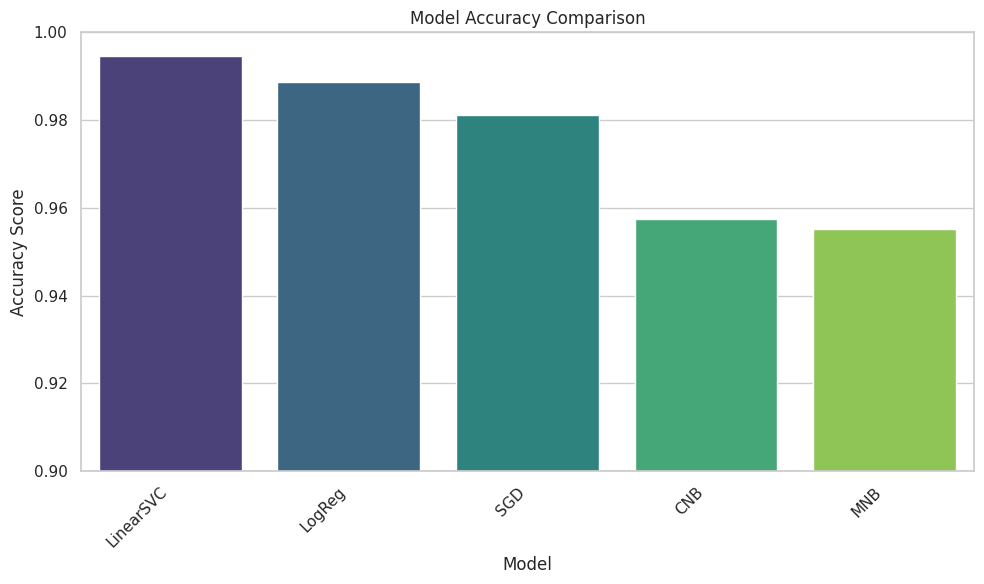

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0) # Set y-axis limits for better visualization of high accuracies
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pick Best, Detailed Report & Save Artifacts

üèÜ Best model: LinearSVC

Classification Report:

              precision    recall  f1-score   support

     Fake(0)       1.00      0.99      0.99      3491
     True(1)       0.99      1.00      1.00      4238

    accuracy                           0.99      7729
   macro avg       0.99      0.99      0.99      7729
weighted avg       0.99      0.99      0.99      7729



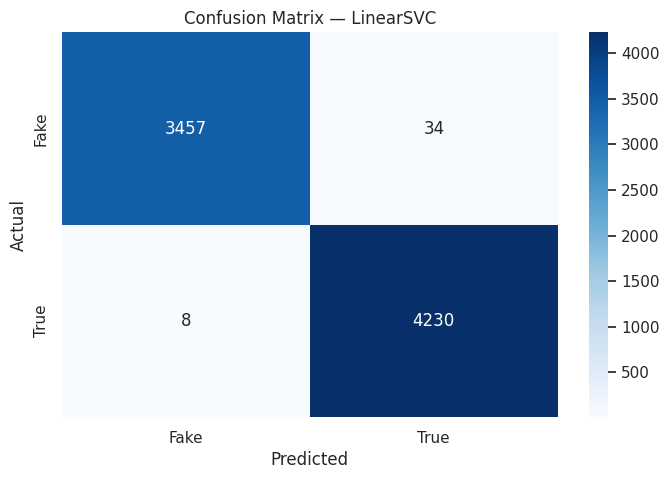

üíæ Saved: models/best_pipeline_LinearSVC.joblib


In [8]:
# Cell 6: Best model, report, confusion matrix, save .joblib
best_name = results_df.iloc[0]['Model']
best_pipe = trained[best_name]
print("üèÜ Best model:", best_name)

y_pred = best_pipe.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Fake(0)','True(1)']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake','True'], yticklabels=['Fake','True'])
plt.title(f'Confusion Matrix ‚Äî {best_name}')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

os.makedirs('models', exist_ok=True)
joblib.dump(best_pipe, f'models/best_pipeline_{best_name}.joblib')
results_df.to_csv('models/all_model_scores.csv', index=False)
print("üíæ Saved:", f'models/best_pipeline_{best_name}.joblib')


Streamlit UI

In [9]:
# Cell 8: Write a gorgeous Streamlit app (app.py)
%%writefile app.py
import streamlit as st
import joblib, os, json, time, re
import numpy as np
import pandas as pd
from emoji import emojize

APP_TITLE = "üì∞ Fake / Truth News Detector"
SUBTITLE = "TF-IDF + Multiple ML Models ‚Üí Best Model Deployed"

# ========== Styling ==========
st.set_page_config(page_title="Fake/Truth Detector", page_icon="üì∞", layout="wide")

CSS = """
<style>
/* Gradient background + glass cards */
.reportview-container .main, .block-container {
  background: linear-gradient(135deg, #0f172a 0%, #1e293b 40%, #0b132b 100%);
  color: #e5e7eb;
}
h1, h2, h3, h4, h5 { color: #f8fafc; }
.sidebar .sidebar-content { background: #0b132b; }
.stTextInput>div>div>input, .stTextArea textarea {
  background: rgba(255,255,255,0.05) !important;
  border-radius: 14px !important;
}
.glass {
  background: rgba(255,255,255,0.06);
  border: 1px solid rgba(255,255,255,0.15);
  box-shadow: 0 10px 25px rgba(0,0,0,0.25);
  backdrop-filter: blur(8px);
  border-radius: 16px;
  padding: 18px;
}
.tag {
  display:inline-block; padding:6px 10px; border-radius:999px;
  background: rgba(255,255,255,0.08); margin-right:6px; font-size:0.85rem;
}
.pred-true  { background: linear-gradient(90deg, #22c55e, #16a34a); }
.pred-fake  { background: linear-gradient(90deg, #ef4444, #dc2626); }
.kpi {
  background: rgba(255,255,255,0.05);
  border-radius: 16px; padding: 16px; text-align:center;
}
.kpi h3 { margin: 0; font-size: 0.95rem; color: #cbd5e1; }
.kpi p  { font-size: 1.4rem; margin: 4px 0 0 0; color: #f8fafc; }
a { color: #93c5fd; }
</style>
"""
st.markdown(CSS, unsafe_allow_html=True)

# ========== Load Best Model ==========
@st.cache_resource
def load_best():
    # pick any best_* if present
    model_dir = 'models'
    if not os.path.exists(model_dir):
        st.error("No model found. Please train in the notebook first.")
        st.stop()
    cands = [f for f in os.listdir(model_dir) if f.startswith('best_pipeline_') and f.endswith('.joblib')]
    if not cands:
        st.error("No saved pipeline found. Train & export first.")
        st.stop()
    # choose the latest saved
    cands.sort(key=lambda x: os.path.getmtime(os.path.join(model_dir, x)), reverse=True)
    pipe = joblib.load(os.path.join(model_dir, cands[0]))
    name = cands[0].replace('best_pipeline_','').replace('.joblib','')
    return pipe, name

pipe, best_name = load_best()

# ========== Header ==========
st.title(APP_TITLE)
st.write(f"**{SUBTITLE}**  ‚Äî Deployed model: `{best_name}`")

colA, colB, colC = st.columns(3)
with colA:
    st.markdown('<div class="kpi"><h3>Vectorizer</h3><p>TF-IDF (1‚Äì2 gram)</p></div>', unsafe_allow_html=True)
with colB:
    st.markdown(f'<div class="kpi"><h3>Classifier</h3><p>{best_name}</p></div>', unsafe_allow_html=True)
with colC:
    st.markdown('<div class="kpi"><h3>Batch</h3><p>CSV Upload</p></div>', unsafe_allow_html=True)

st.markdown("---")

# ========== Tabs ==========
tab1, tab2 = st.tabs(["üîé Predict", "üì¶ Batch & Download"])

with tab1:
    st.subheader("Post the full newsüì∞")
    user_text = st.text_area("Paste news content or headline here:", height=200, placeholder="Type/paste your news text...")
    btn = st.button("Analyze")
    if btn and user_text.strip():
        with st.spinner("Scoring..."):
            # Predict
            try:
                proba = None
                y_pred = pipe.predict([user_text])[0]
                try:
                    proba = pipe.predict_proba([user_text])[0][1]  # prob of True
                except Exception:
                    # decision_function to pseudo-prob
                    try:
                        score = pipe.decision_function([user_text])[0]
                        proba = 1/(1+np.exp(-score))
                    except Exception:
                        proba = None

                label = "True" if y_pred==1 else "Fake"
                conf  = f"{proba*100:.2f}%" if proba is not None else "‚Äî"

                color_class = "pred-true" if y_pred==1 else "pred-fake"
                st.markdown(f'<div class="glass {color_class}"><h2 style="margin:0;">Prediction: {label} {emojize(":white_check_mark:" if y_pred==1 else ":cross_mark:")}</h2><p style="margin:6px 0 0 0;">Confidence: <b>{conf}</b></p></div>', unsafe_allow_html=True)

                # Token contributions (if linear model)
                if hasattr(pipe.named_steps['clf'], 'coef_'):
                    vect = pipe.named_steps['tfidf']
                    clf  = pipe.named_steps['clf']
                    x = vect.transform([user_text])
                    coef = clf.coef_.ravel()
                    contrib = x.multiply(coef)
                    contrib = np.asarray(contrib.todense()).ravel()
                    vocab = vect.get_feature_names_out()
                    top_idx = np.argsort(contrib)[-10:][::-1]
                    top_tokens = [(vocab[i], float(contrib[i])) for i in top_idx if contrib[i] > 0]
                    if top_tokens:
                        st.write("**Top positive tokens:**")
                        for tok, val in top_tokens:
                            st.markdown(f'<span class="tag">{tok}</span>', unsafe_allow_html=True)
                else:
                    st.caption("Token-level explanation available for linear models.")
            except Exception as e:
                st.error(f"Error: {e}")

with tab2:
    st.subheader("Batch Predict (CSV)")
    st.write("Upload a CSV with a column named `text` (or `title`).")
    up = st.file_uploader("Upload CSV", type=['csv'])
    if up is not None:
        try:
            df = pd.read_csv(up)
            # robust pick
            text_col = None
            for c in ['text','content','article','body','title','headline']:
                if c in df.columns:
                    text_col = c; break
            if text_col is None:
                st.error("No text/title-like column found.")
            else:
                preds = pipe.predict(df[text_col].astype(str).fillna(''))
                try:
                    probs = pipe.predict_proba(df[text_col].astype(str).fillna(''))[:,1]
                except Exception:
                    # decision_function fallback
                    try:
                        scores = pipe.decision_function(df[text_col].astype(str).fillna(''))
                        probs = 1/(1+np.exp(-scores))
                    except:
                        probs = np.full(len(preds), np.nan)

                out = df.copy()
                out['pred_label'] = np.where(preds==1, 'True', 'Fake')
                out['pred_prob_true'] = probs
                st.success("Done.")
                st.dataframe(out.head(20))
                csv = out.to_csv(index=False).encode()
                st.download_button("‚¨áÔ∏è Download Predictions", csv, "predictions.csv", "text/csv")
        except Exception as e:
            st.error(f"Failed to process: {e}")

st.markdown("---")
st.caption("Built with ‚ù§Ô∏è Streamlit ¬∑ TF-IDF ¬∑ Scikit-learn ¬∑ XGBoost")


Writing app.py


In [13]:
!ngrok config add-authtoken 2zUHPKEaHnp4MN5L09ImZ84L4ay_3b3kGUZDfK175M6qzXo16


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [14]:
# Cell 9B: Launch Streamlit via ngrok (if you have a token)
!pip -q install pyngrok
from pyngrok import ngrok
import os
os.environ["PYNGROK_DEFAULT_REGION"] = "ap"
# ngrok.set_auth_token("YOUR_NGROK_AUTHTOKEN")  # <- set if you have one
public_url = ngrok.connect(8501)
get_ipython().system_raw('streamlit run app.py --server.port 8501 --server.headless true &')
public_url


<NgrokTunnel: "https://99753cc60056.ngrok-free.app" -> "http://localhost:8501">